In [91]:
import pandas as pa
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

dti = pa.read_csv("Important_data.csv", na_values=['No'])
df = pa.read_csv("trans-characters-in-youth-cartoons.csv")

## Données très utile

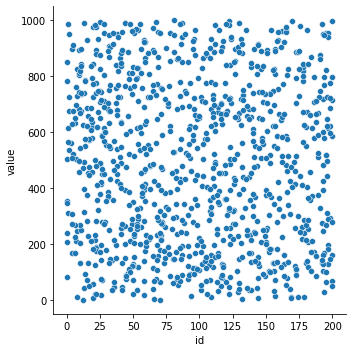

In [19]:
sns.relplot(x="id",y="value", data = dti)

# Qu'est ce que la representation dans un media ?

La representation dans un media et le fait de montrer un personnage presenatnt les caractéristiques de la population que l'on souhaite représenter

## Representation de personnage LGBTQ+ dans les dessin animé dysney par le passé
### Queercoding

<img src = "http://img2.wikia.nocookie.net/__cb20130101204423/youtubepoop/images/5/56/Jafar.png" />

<img src = "https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.komitid.fr%2Fwp-content%2Fuploads%2F2018%2F03%2FScar-Disney-768x432.jpg&f=1&nofb=1" />

Deux personnage ayant un character design evoquant l'utilisation d'eyeliner

<img src = "http://cdn.evoke.ie/wp-content/uploads/2017/07/21165241/the-agony-of-making-a-decision-the-little-mermaid-ursula.jpg" />

Ursula et son inspiration, la drag queen Divine

### Queerbaiting
<img src = "https://i0.wp.com/livewire.thewire.in/wp-content/uploads/2021/10/Luca-Alberto-And-Luca-In-Village.jpg?fit=1024%2C553&ssl=1" />





# Representation par rapport au temps

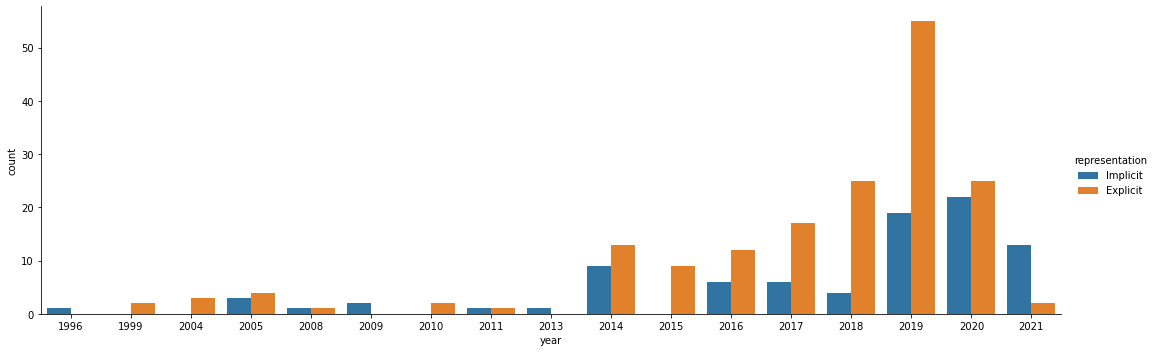

In [35]:
sns.catplot(data=df,kind="count",x="year", aspect = 3, hue="representation")

On voit ici que la representation a surtout démarrer au alentour de 2014

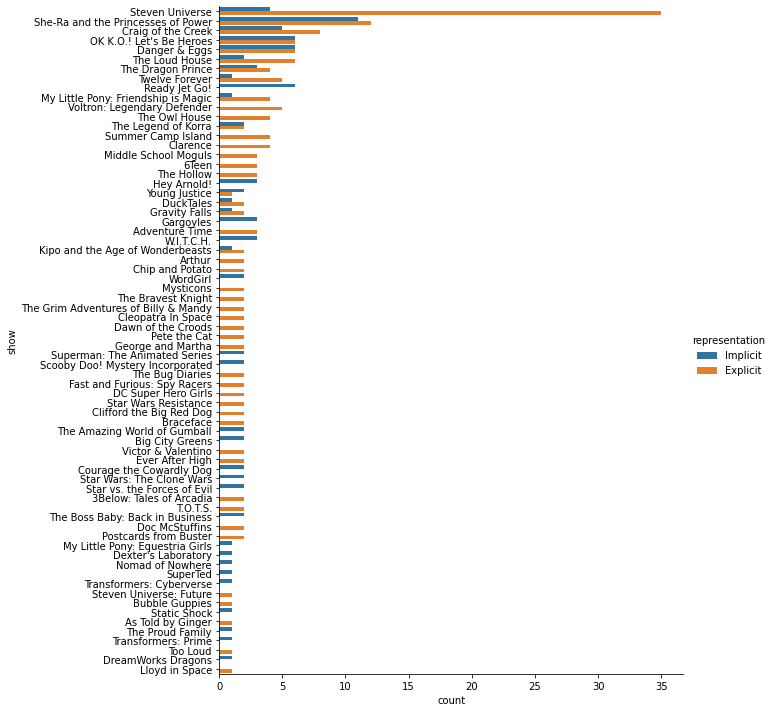

In [37]:
sns.catplot(data=df,kind="count",y="show", height = 10, order= df['show'].value_counts().index, hue = "representation")

On voit que la majorité des representation sont porté par quelques series

In [34]:
df['show'].value_counts().size

70

In [38]:
df.loc[df["representation"] == "Explicit"]['show'].value_counts().size

48

In [44]:
df.loc[(df["representation"] == "Explicit") &(df["year"] >= 2014) ]['show'].value_counts().size

42

Il y a 70 series contenant une representation LGBTQ+, dont 48 possédant au moins une représentation explicite
Il y avait 75 nouvelle serie en 2010
Ces representation peuvent être moins d'une seconde, ou difficile à remarquer

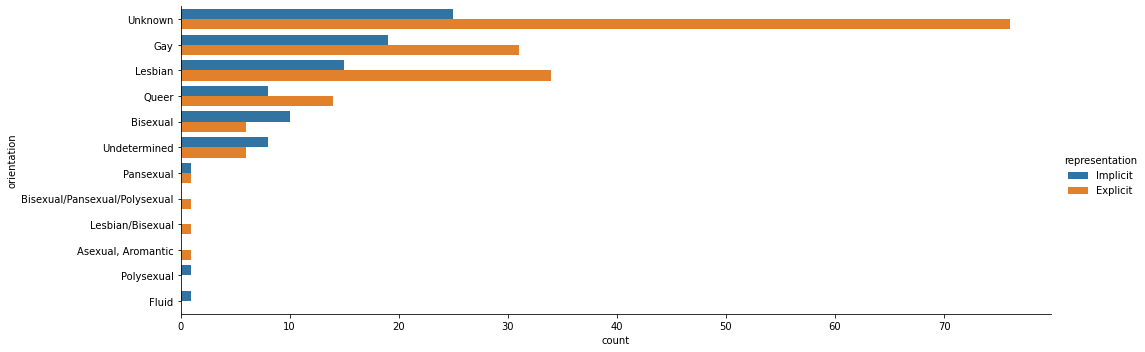

In [43]:
##Representation orientation
sns.catplot(data=df,kind="count",y="orientation", aspect = 3, hue = "representation")

On voit que la representation est majoritairement porté sur les personne gay et lesbienne, avec quelque representation queer et quelque bisexuels
Les orientations bisexuels sont surtout beaucoup implicites

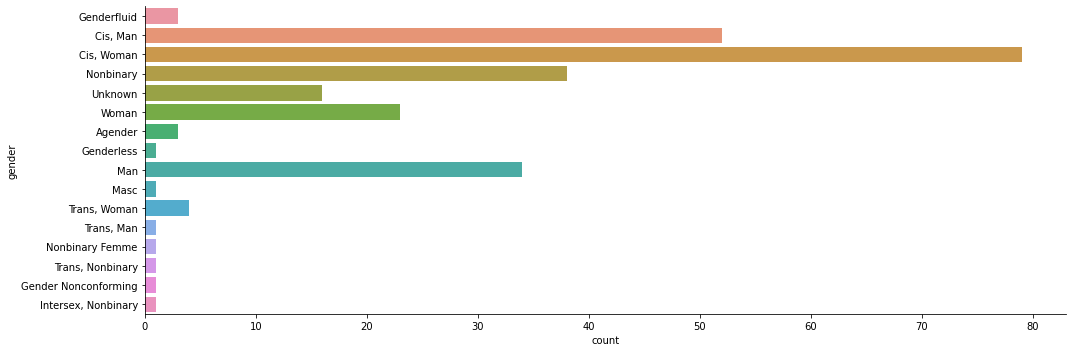

In [40]:
##Representation genre
sns.catplot(data=df,kind="count",y="gender", aspect = 3)

La representation transgenre (binaire ou pas) laisse a désirer et est bien moindre que celle de l'orientation
On note qu'il n'y a qu'un seul homme trans sur l'ensemble de la base de donnée

In [83]:
explicitChar = df.replace({"Explicit": 1, "Implicit" : 0})

stuff = ["Social Media",
"Gender Presentation",
"Identity in Dialogue",
"LGBTQ Symbols/Symbolism",
"Marketing",
"Character Proximity",
"Kiss",
"Romantic Gestures",
"Romantic Partnership",
"Creative Team Interview",
"Affection",
"Pronouns",
"Voice Actor",
"Parenting",
"Insider Confirmation"]

for s in stuff :
    explicitChar[s] = explicitChar.confirmation.str.contains(s) == True

explicitChar.replace({True : 1, False : 0})



,character,show,gender,race,role,studio,representation,orientation,year,platform,...,Character Proximity,Kiss,Romantic Gestures,Romantic Partnership,Creative Team Interview,Affection,Pronouns,Voice Actor,Parenting,Insider Confirmation
0,Acid Storm,Transformers: Cyberverse,Genderfluid,NaN,Recurring Character,"Allspark Animation, Boulder Media Limited",0,Unknown,2018,Cartoon Network,...,0,0,0,0,0,0,0,0,0,0
1,Adam,The Hollow,"Cis, Man",POC,Main Character,Slap Happy Cartoons,1,Gay,2020,Netflix,...,0,0,0,0,0,0,0,0,0,0
2,Adam,Voltron: Legendary Defender,"Cis, Man",Unknown,Guest Character,"DreamWorks Animation Television, World Events ...",1,Gay,2018,Netflix,...,1,0,0,0,0,0,0,0,0,0
3,Adora,She-Ra and the Princesses of Power,"Cis, Woman",White,Main Character,"DreamWorks Animation Television, Mattel Creations",1,Lesbian,2020,Netflix,...,0,1,1,1,0,0,0,0,0,0
4,Alexander,Big City Greens,"Cis, Man",Undetermined,Recurring Character,Disney Television Animation,0,Gay,2018,Disney Channel,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,Zadie,Danger & Eggs,"Trans, Woman",POC,Guest Character,"PUNY Entertainment, Amazon Studios",1,Undetermined,2017,Amazon Prime Video,...,0,0,0,0,1,0,0,1,0,0
255,Zarya Moonwolf,Mysticons,"Cis, Woman",White,Main Character,Nelvana,1,Lesbian,2018,"Nickelodeon, Nicktoons",...,0,0,0,0,0,1,0,0,0,0
256,Zerk,Ready Jet Go!,Unknown,NaN,Guest Character,"Wind Dancer Films, Snee-Oosh Productions",0,Unknown,2020,PBS Kids,...,0,0,0,0,0,0,0,0,0,0
257,Zoit,Lloyd in Space,Agender,NaN,Guest Character,Disney Television Animation,1,Undetermined,2021,"ABC Kids, Toon Disney",...,0,0,0,0,0,0,1,0,0,0


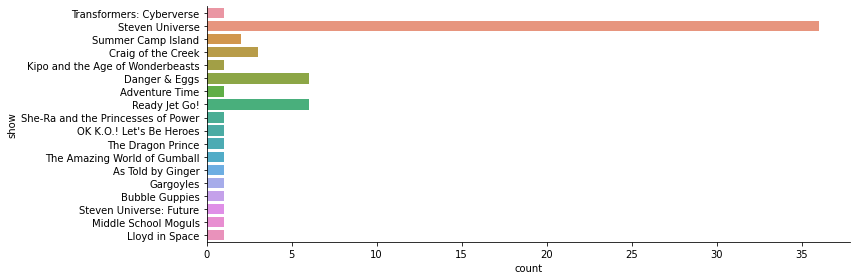

In [68]:
nbData = df.loc[("Woman" != df["gender"]) &( "Man" != df["gender"])&( "Cis, Man" != df["gender"]) & ( "Cis, Woman" != df["gender"]) & ( "Trans, Woman" != df["gender"])& ( "Trans, Man" != df["gender"]) ]

sns.catplot(y="show", 

                data=nbData, kind="count",

                height=4, aspect = 3);

On a ici la representation de toute les personne non-binaires

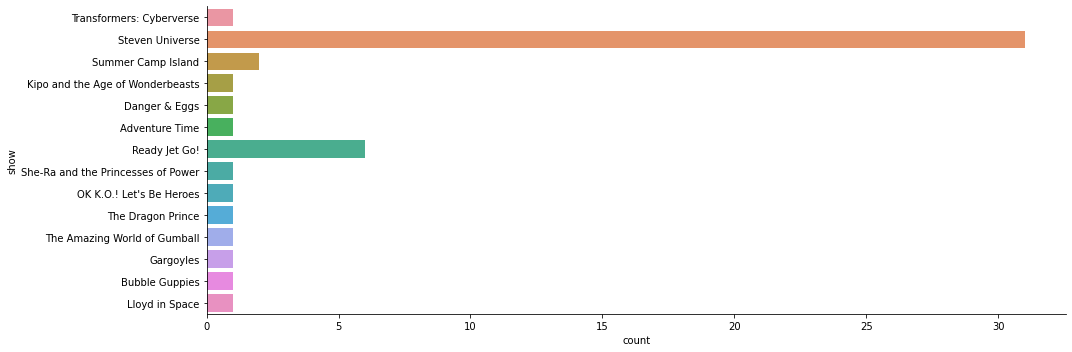

In [8]:
UnknownNbData = nbData.loc[(nbData["race"] != "White") & (nbData["race"] != "POC") & (nbData["race"] != "Unknown") ]

sns.catplot(data=UnknownNbData,kind = "count", y="show", aspect = 3)



Et içi la representation des personnes non-binaire non- humaine (identifié par l'ethnie etant non applicable)
On peut voir que les deux graphes sont très similaire

<AxesSubplot:>

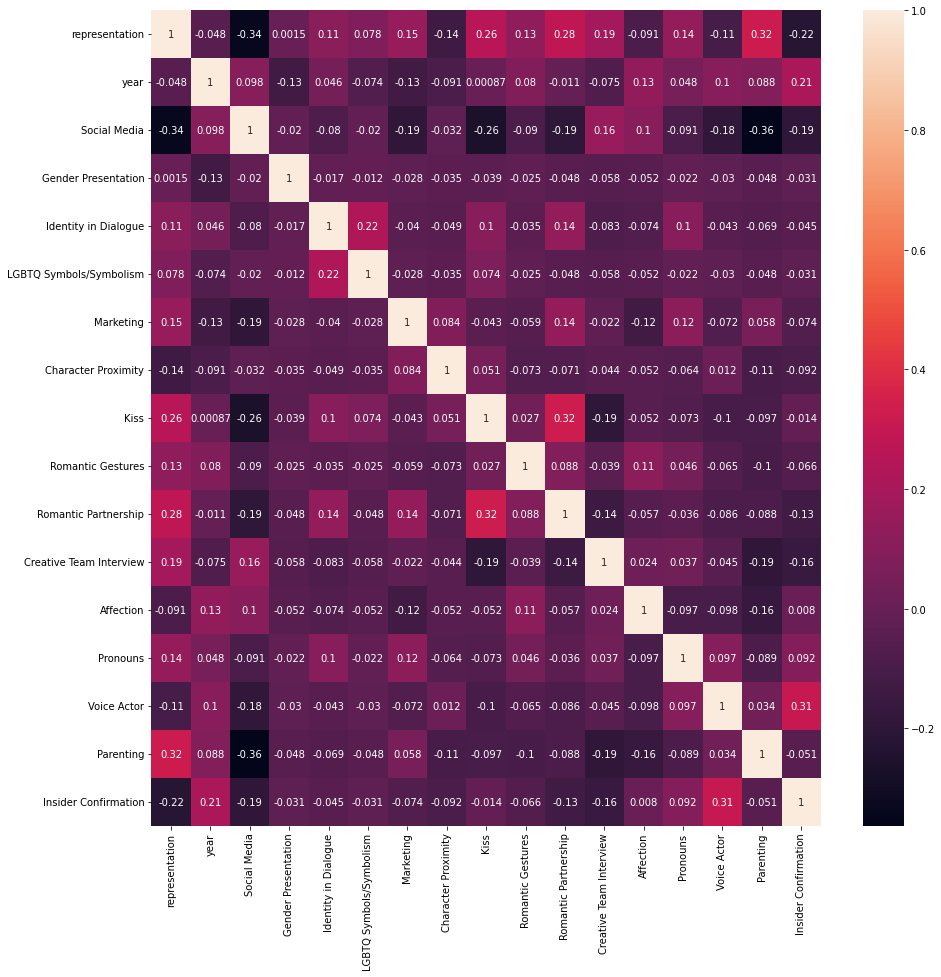

In [92]:
plt.figure(figsize = (15,15))
sns.heatmap(data = explicitChar.corr(),annot = True)

On a ici la correclation entre diferentes caracteristiques de la representation representé en 1 ou 0